<a href="https://colab.research.google.com/github/MahendraVarma17/projects/blob/main/coffe_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [21]:
coffee_data = pd.read_csv('/content/coffee_sales.csv')


In [22]:
X = coffee_data.drop(columns=['money'])
y = coffee_data['money']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.30939421446187537
R^2 Score: 0.9833806206896838


In [23]:
coffee_data['money'].fillna(coffee_data['money'].median(), inplace=True)
coffee_data['coffee_name'].fillna(coffee_data['coffee_name'].mode()[0], inplace=True)
coffee_data['date'] = pd.to_datetime(coffee_data['date'])

In [24]:
from scipy.stats import zscore
coffee_data = coffee_data[(np.abs(zscore(coffee_data[['money']])) < 3).all(axis=1)]

In [25]:
coffee_data['Month'] = coffee_data['date'].dt.month
coffee_data['Year'] = coffee_data['date'].dt.year
coffee_data.drop(columns=['date'], inplace=True)

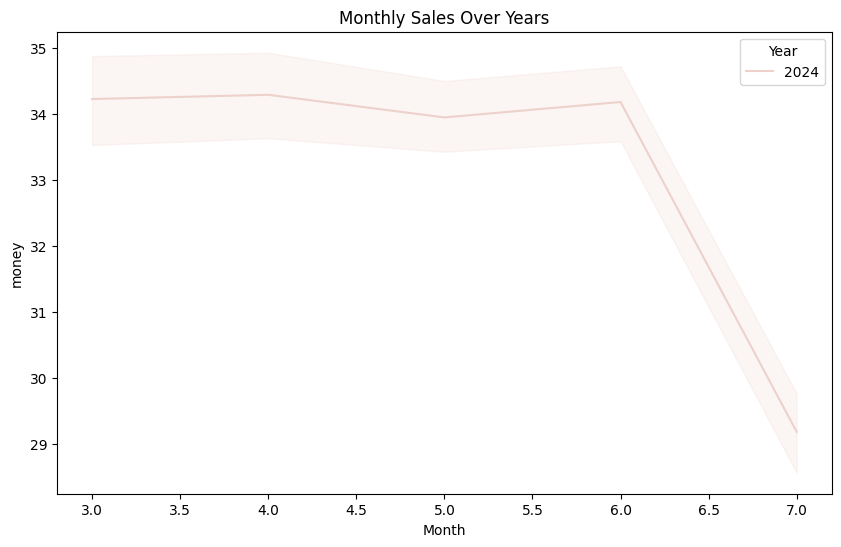

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=coffee_data, x='Month', y='money', hue='Year')
plt.title('Monthly Sales Over Years')
plt.show()

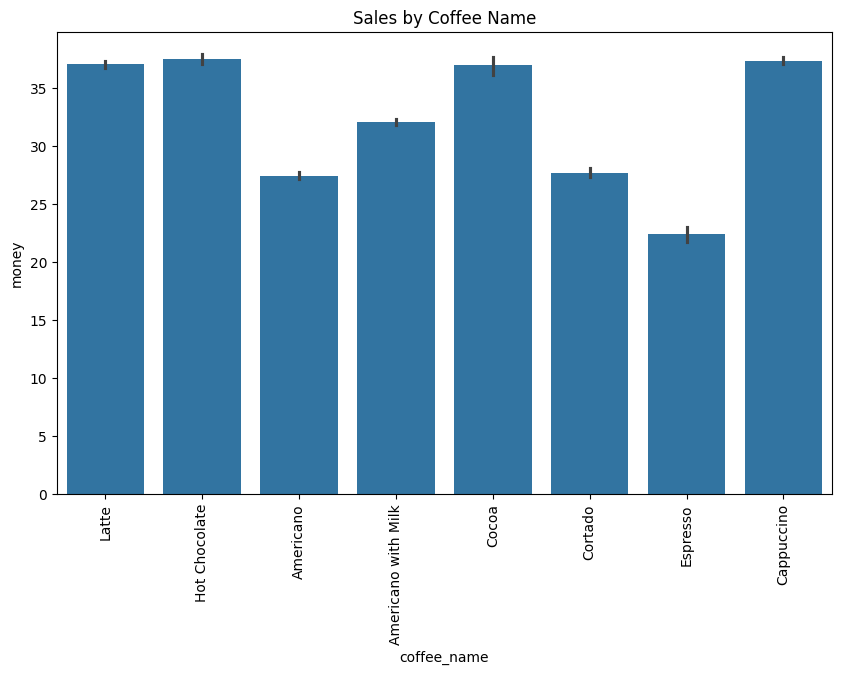

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=coffee_data, x='coffee_name', y='money')
plt.title('Sales by Coffee Name')
plt.xticks(rotation=90)
plt.show()

In [28]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                            Coefficient
date_2024-03-02            4.017837e-01
date_2024-03-03            5.420105e-01
date_2024-03-04            1.554312e-15
date_2024-03-05            4.503922e-01
date_2024-03-06            5.957941e-01
...                                 ...
coffee_name_Cocoa          8.955451e+00
coffee_name_Cortado       -3.263896e-01
coffee_name_Espresso      -5.211146e+00
coffee_name_Hot Chocolate  9.155401e+00
coffee_name_Latte          1.001510e+01

[1734 rows x 1 columns]
